Guck Dir die Datei Immobilien.xlsx an, erstelle daraus ein DataFrame und beantworte
folgende Fragen:

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#### Aufgabe 1
Datentypen und Skalenniveaus für die folgenden Variablen bestimmen: Kunden-ID,
Finanzierung, Verkaufsjahr

In [189]:
df = pd.read_excel('Immobilien.xlsx', usecols='B:J, L:AA', skiprows=4) #oder header=4

c:\Users\OlhaIshchenko\Documents\Daten_Analyse\unterricht\.my_venv\Lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [190]:
df.columns

Index(['ID', 'Gebäude', 'Verkaufsjahr', 'Verkaufsmonat', 'Objektart',
       'Objekt-Nr.', 'Fläche (Fuß)', 'Preis', 'Status', 'Kunden-ID',
       'Kundenart', 'Vorname', 'Nachname', 'Alter zum Kaufzeitpunkt',
       'Intervall', 'Jahr', 'M', 'D', 'Geschlecht', 'Land', 'Bundesstaat',
       'Zweck', 'Zufriedenheit', 'Finanzierung', 'Quelle'],
      dtype='object')

In [191]:
df[['Verkaufsjahr', 'Kunden-ID', 'Finanzierung']].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Verkaufsjahr  195 non-null    float64
 1   Kunden-ID     195 non-null    object 
 2   Finanzierung  195 non-null    object 
dtypes: float64(1), object(2)
memory usage: 6.4+ KB


In [192]:
df['Verkaufsjahr'].unique()

array([2005., 2007., 2004., 2008., 2006., 2010.,   nan])

In [193]:
df['Finanzierung'].unique()

array(['Nein', 'Ja', nan], dtype=object)

In [194]:
df['Kunden-ID'].unique()[:5]

array(['C0028', 'C0027', 'C0112', 'C0160', 'C0014'], dtype=object)

#### Aufgabe 2
Stelle die Verteilung der Käufer anhand ihres Geschlechts in einem Kreisdiagram dar.
Überlege dir genau welche Kategorien Du dafür benötigst. Was können wir anhand der
Daten für eine AUssage über die Käufer treffen ?

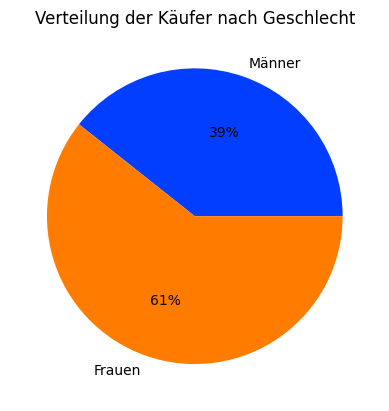

In [195]:
gr = df.groupby('Geschlecht')
gr.size()
labels = ["Männer", "Frauen"]
colors = sns.color_palette("bright")
plt.pie(gr.size(), labels=labels, colors=colors, autopct="%0.0f%%")
plt.title("Verteilung der Käufer nach Geschlecht")
plt.show()

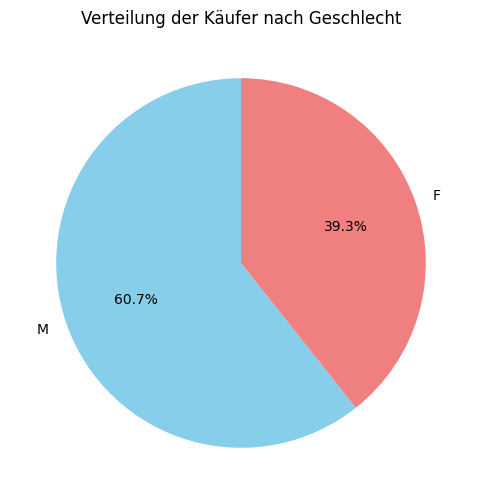

In [196]:
# Geschlecht-Verteilung
gender_counts = df['Geschlecht'].value_counts()

# Kreisdiagramm erstellen
plt.figure(figsize=(6, 6))
gender_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title("Verteilung der Käufer nach Geschlecht")
plt.ylabel("")  # Entfernt die y-Achse
plt.show()

#### Aufgabe 3
Stelle den Preis aller Immobilien, egal ob verkauft oder nicht, als Histogramm dar. Stelle
jeden unterschiedlichen Preis als eigenen “Balken” dar.

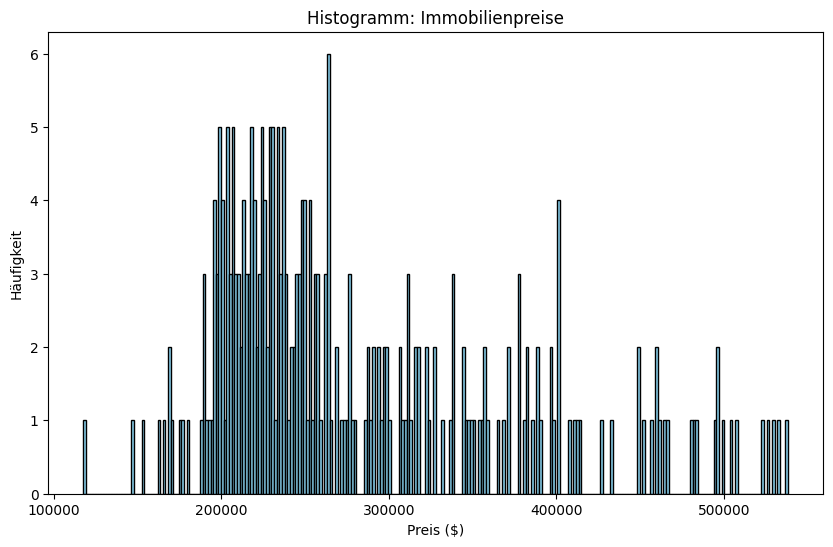

In [197]:
plt.figure(figsize=(10, 6))
plt.hist(df['Preis'], bins=len(df['Preis'].unique()), color='skyblue', edgecolor='black')
plt.title("Histogramm: Immobilienpreise")
plt.xlabel("Preis ($)")
plt.ylabel("Häufigkeit")
plt.show()

#### Aufgabe 4
Stelle den Preis als Histogramm mit einer Intervallbreite von 20.000 $ Dollar dar.
Benutze für das Histogramm seaborn und zeige die geschätzte Dichtefunktion an.

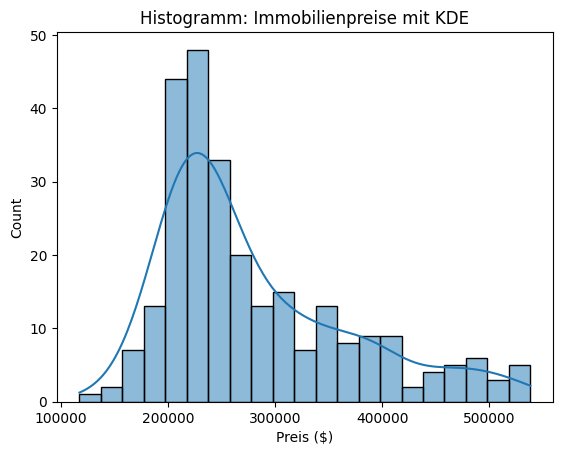

In [198]:
sns.histplot(df['Preis'], binwidth=20000, kde=True)
plt.xlabel("Preis ($)")
plt.title("Histogramm: Immobilienpreise mit KDE");

#### Aufgabe 5
Mittel, Median, Schiefe und Standardabweichung der Variable „Preis“ für alle Objekte
berechnen, ob verkauft oder nicht. Zeichne Mittel, Median und Stdabweichung mit
waagrechten und senkrechten Linien in das Histogramm von Aufgabe 4

In [199]:
mean_preis = df['Preis'].mean()
median_preis = df['Preis'].median()
std_preis = df['Preis'].std()
skew_preis = stats.skew(df['Preis'])
print(f"Mittel: {mean_preis:.2f}, Median: {median_preis:.2f}, Std: ",
      f"{std_preis:.2f}, Schiefe: {skew_preis:.2f}")

Mittel: 281171.90, Median: 249075.66, Std:  89119.12, Schiefe: 1.09


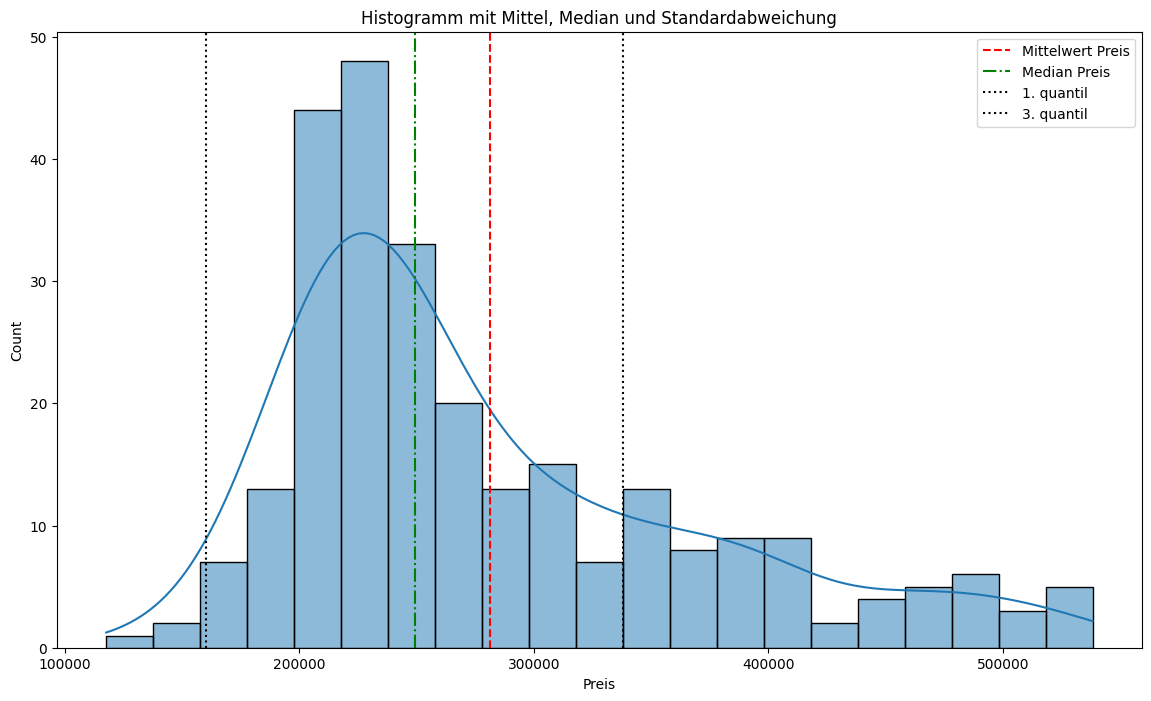

In [200]:
plt.figure(figsize=(14,8))
sns.histplot(df['Preis'], binwidth=20000, kde=True)
plt.axvline(mean_preis, color='red', linestyle='--', label='Mittelwert Preis')
plt.axvline(median_preis, color='green', linestyle='-.', label='Median Preis')
plt.axvline(median_preis+std_preis, color='black', linestyle=':', label='1. quantil')
plt.axvline(median_preis-std_preis, color='black', linestyle=':', label='3. quantil')
plt.title("Histogramm mit Mittel, Median und Standardabweichung")
plt.legend();

#### Aufgabe 6
Stelle den Preis und die Fläche aller Objekte als Punktdiagramm dar und berechne die
Korrelation der beiden Werte.

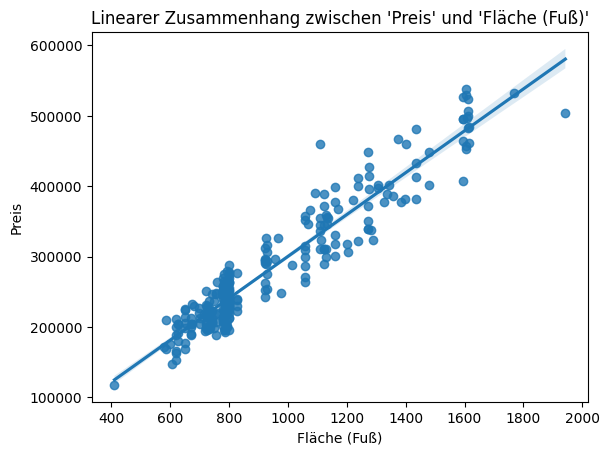

In [201]:
# Regressionsplot für 'Preis' und 'Fläche'
sns.regplot(y='Preis', x='Fläche (Fuß)', data=df, ci=90)
plt.title("Linearer Zusammenhang zwischen 'Preis' und 'Fläche (Fuß)'")
plt.show()

In [202]:
df['Status'] = df['Status'].fillna('Nicht verkauft')

Text(0.5, 1.0, 'Preis vs. Fläche')

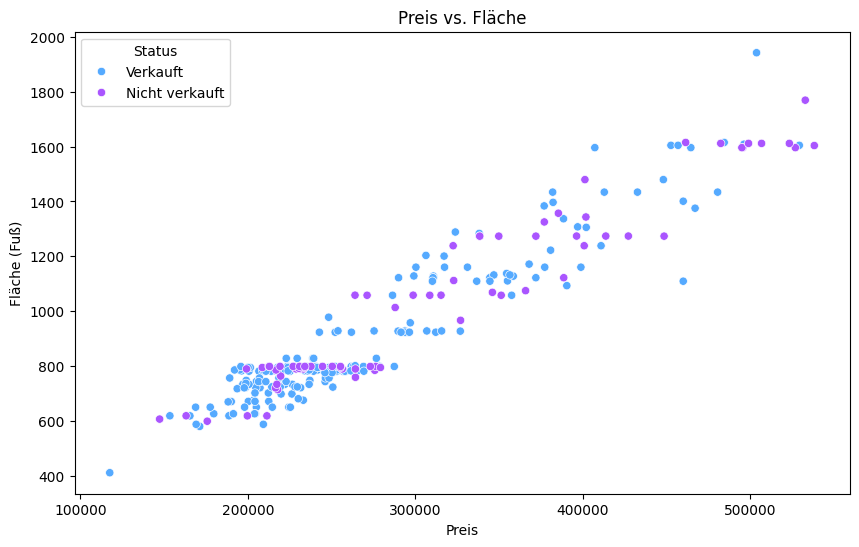

In [203]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x=df['Preis'], y=df['Fläche (Fuß)'], hue='Status', palette='cool')
plt.title('Preis vs. Fläche')

In [204]:
corr_p_f = df[['Preis', 'Fläche (Fuß)']].corr()
print(f"Korrelation zwischen Fläche und Preis: {corr_p_f['Preis']['Fläche (Fuß)']:.3f}")

Korrelation zwischen Fläche und Preis: 0.951


#### Aufgabe 7
Berechne die absolute, relative und kumulative Häufigkeit (np.cumsum für kummulierte
Häufigkeit, siehe Internet ;) aller Länder in denen Käufer eine Immobilie erworben
haben. Erstelle ein Balkendiagramm der Länder, nach Häufigkeit sortiert.

             Absolute Häufigkeit  Relative Häufigkeit  Kumulative Häufigkeit
Land                                                                        
USA                          177             0.907692               0.907692
Kanada                         7             0.035897               0.943590
Russland                       4             0.020513               0.964103
England                        2             0.010256               0.974359
Belgien                        2             0.010256               0.984615
Dänemark                       1             0.005128               0.989744
Deutschland                    1             0.005128               0.994872
Mexiko                         1             0.005128               1.000000


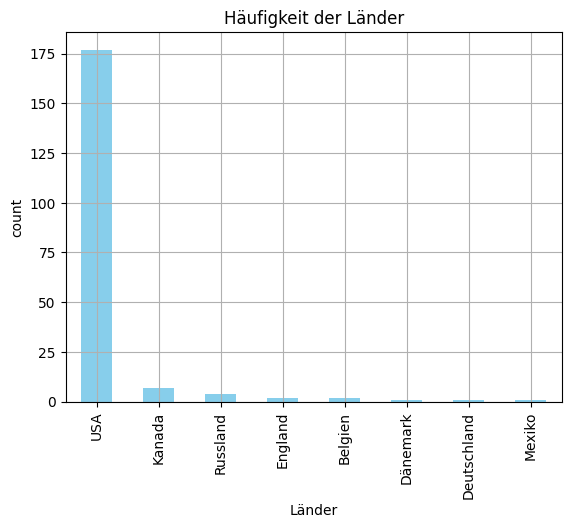

In [205]:
# Häufigkeiten berechnen
count_land = df['Land'].value_counts()
relative_häüfigkeit = count_land / count_land.sum()
kumulative_häüfigkeit = relative_häüfigkeit.cumsum()

# neu Tabelle erstellen
häufigkeit_tabelle = pd.DataFrame({
    'Absolute Häufigkeit': count_land,
    'Relative Häufigkeit': relative_häüfigkeit,
    'Kumulative Häufigkeit': kumulative_häüfigkeit
})

print(häufigkeit_tabelle)

häufigkeit_tabelle['Absolute Häufigkeit'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.xlabel('Länder')
plt.ylabel('count')
plt.title('Häufigkeit der Länder')

plt.grid(True);

#### Aufgabe 8
Erstelle ein Paretodiagramm (siehe Pareto-Prinzip.ipynb
https://bbqberlin.sharepoint.com/:u:/s/B-WI138-U-FI240111/EcyCIcNSt6RPl8yAD2ubpyQBjbeGwDENRAmAB7-BrI8bKA?e=U0Rxs2) der
Länder aus Aufgabe 7.

In [206]:
df_hauf = häufigkeit_tabelle.sort_values(by='Absolute Häufigkeit', ascending=False)
df_hauf['Kumulierte Prozent'] = df_hauf['Kumulative Häufigkeit'] * 100

df_hauf = df_hauf.reset_index()
df_hauf

,Land,Absolute Häufigkeit,Relative Häufigkeit,Kumulative Häufigkeit,Kumulierte Prozent
0,USA,177,0.907692,0.907692,90.769231
1,Kanada,7,0.035897,0.943590,94.358974
2,Russland,4,0.020513,0.964103,96.410256
3,England,2,0.010256,0.974359,97.435897
4,Belgien,2,0.010256,0.984615,98.461538
5,Dänemark,1,0.005128,0.989744,98.974359
6,Deutschland,1,0.005128,0.994872,99.487179
7,Mexiko,1,0.005128,1.000000,100.000000


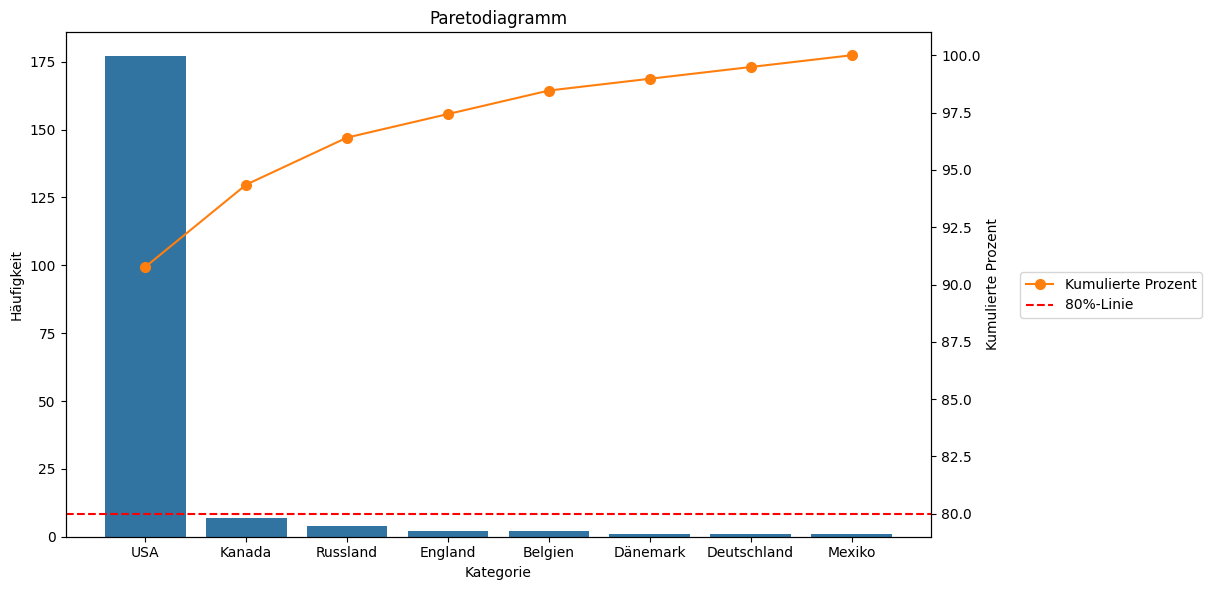

In [207]:
# Paretodiagramm erstellen
fig, ax = plt.subplots(figsize=(12,6))

# Balkendiagramm mit Seaborn
sns.barplot(x='Land', y='Absolute Häufigkeit', data=df_hauf, color='C0', ax=ax)

# Sekundärachse für die kumulative Prozentlinie
ax2 = ax.twinx()    # erzeugt eine zweite y Achse auf der rechten Seite
ax2.plot(df_hauf['Land'], df_hauf['Kumulierte Prozent'], color='C1', marker='o', ms=7, linestyle='-', label='Kumulierte Prozent')
ax2.axhline(y=80, color='r', linestyle='--', label='80%-Linie')

# Achsen und Labels
ax.set_ylabel('Häufigkeit')
ax2.set_ylabel('Kumulierte Prozent')
ax.set_xlabel('Kategorie')

# Legende außerhalb des Plots rechts anzeigen
fig.legend(loc='center', bbox_to_anchor=(0.93, 0.5), borderaxespad=0)

# Anzeigen des Diagramms
plt.title('Paretodiagramm')
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Platz für die Legende schaffen

plt.show()
